# **NLP Project: Bible verses classification**





> **Multi-Class Text Classification Task**


---


**Problem Statement:** Given a passage/verse, predict which book of the Bible it belongs to (out of 60+ books).


**Input :** *A single verse or a small paragraph*  <br>
**Output:** *The name of the book from the Bible to which this passage/verse belongs*

# **PHASE 1: Data Acquisition**

In [ ]:
# common imports

import numpy as np                   # numerical computations on arrays
import pandas as pd                  # dataframes manipulation
import matplotlib.pyplot as plt      # data visualization
import seaborn as sns                # enhanced data visualization
%matplotlib inline

In [ ]:
# import the data

df = pd.read_csv('bible_data_set.csv')

In [ ]:
# check if data loaded correctly

df.head()

,citation,book,chapter,verse,text
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ..."
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness..."


In [ ]:
df

,citation,book,chapter,verse,text
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ..."
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness..."
...,...,...,...,...,...
31097,Revelation 22:17,Revelation,22,17,"And the Spirit and the bride say, Come. And le..."
31098,Revelation 22:18,Revelation,22,18,For I testify unto every man that heareth the ...
31099,Revelation 22:19,Revelation,22,19,And if any man shall take away from the words ...
31100,Revelation 22:20,Revelation,22,20,"He which testifieth these things saith, Surely..."


In [ ]:
# shorten the data (due to compute issue, colab is crashing due to huge embeddings generated)

# we will work only with the new testament of the Bible
# 40 .Matthew
# 41. Mark
# 42. Luke
# 43. John
# 44. Acts
# 45. Romans
# 46. 1 Corinthians
# 47. 2 Corinthians
# 48. Galatians
# 49. Ephesians
# 50. Philippians
# 51. Colossians
# 52. 1 Thessalonians
# 53. 2 Thessalonians
# 54. 1 Timothy
# 55. 2 Timothy
# 56. Titus
# 57. Philemon
# 58. Hebrews
# 59. James
# 60. 1 Peter
# 61. 2 Peter
# 62. 1 John
# 63. 2 John
# 64. 3 John
# 65. Jude
# 66. Revelation

# the above are the books of new testament
# filter only these books
df_new = df['book'].isin(['Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians', '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians', '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon', 'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude', 'Revelation'])
df = df[df_new]

# **PHASE 2: Exploratory Data Analysis**

In [ ]:
df

,citation,book,chapter,verse,text
23145,Matthew 1:1,Matthew,1,1,"The book of the generation of Jesus Christ, th..."
23146,Matthew 1:2,Matthew,1,2,Abraham begat Isaac; and Isaac begat Jacob; an...
23147,Matthew 1:3,Matthew,1,3,And Judas begat Phares and Zara of Thamar; and...
23148,Matthew 1:4,Matthew,1,4,And Aram begat Aminadab; and Aminadab begat Na...
23149,Matthew 1:5,Matthew,1,5,And Salmon begat Booz of Rachab; and Booz bega...
...,...,...,...,...,...
31097,Revelation 22:17,Revelation,22,17,"And the Spirit and the bride say, Come. And le..."
31098,Revelation 22:18,Revelation,22,18,For I testify unto every man that heareth the ...
31099,Revelation 22:19,Revelation,22,19,And if any man shall take away from the words ...
31100,Revelation 22:20,Revelation,22,20,"He which testifieth these things saith, Surely..."


In [ ]:
# display the metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7957 entries, 23145 to 31101
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   citation  7957 non-null   object
 1   book      7957 non-null   object
 2   chapter   7957 non-null   int64 
 3   verse     7957 non-null   int64 
 4   text      7957 non-null   object
dtypes: int64(2), object(3)
memory usage: 373.0+ KB


There are **31102 rows** with bible verses. <br>
Number of **features** :- 5 <br>
**DataTypes** of features :- strings and integers

In [ ]:
# display the data
df.tail()

,citation,book,chapter,verse,text
31097,Revelation 22:17,Revelation,22,17,"And the Spirit and the bride say, Come. And le..."
31098,Revelation 22:18,Revelation,22,18,For I testify unto every man that heareth the ...
31099,Revelation 22:19,Revelation,22,19,And if any man shall take away from the words ...
31100,Revelation 22:20,Revelation,22,20,"He which testifieth these things saith, Surely..."
31101,Revelation 22:21,Revelation,22,21,The grace of our Lord Jesus Christ be with you...


I think the **features of interest** to us are only **'book'** and **'text'**, citation is not necessary to be used in our case and using chapter and verse number is going to make the model more complex.

In [ ]:
# data summary for numerical data
df.describe()

,chapter,verse
count,7957.000000,7957.000000
mean,10.138997,18.877215
std,7.246575,13.747147
min,1.000000,1.000000
25%,4.000000,8.000000
50%,9.000000,16.000000
75%,15.000000,27.000000
max,28.000000,80.000000


The distribution of verses and chapters in each book is **highly skewed** (both are right skewed)

In [ ]:
# count the number of books and their names
books = df['book'].unique()

for i, j in enumerate(books, start=1):
  print(f'{i}. {j}')

1. Matthew
2. Mark
3. Luke
4. John
5. Acts
6. Romans
7. 1 Corinthians
8. 2 Corinthians
9. Galatians
10. Ephesians
11. Philippians
12. Colossians
13. 1 Thessalonians
14. 2 Thessalonians
15. 1 Timothy
16. 2 Timothy
17. Titus
18. Philemon
19. Hebrews
20. James
21. 1 Peter
22. 2 Peter
23. 1 John
24. 2 John
25. 3 John
26. Jude
27. Revelation


There are a total of **66 books** in the Bible.


In [ ]:
# count the number of verses in each book
df['book'].value_counts()

,count
book,
Luke,1151
Matthew,1071
Acts,1007
John,879
Mark,678
1 Corinthians,437
Romans,433
Revelation,404
Hebrews,303


<Axes: title={'center': 'Plot of verses in each book'}, xlabel='Books', ylabel='No.of verses in each book'>

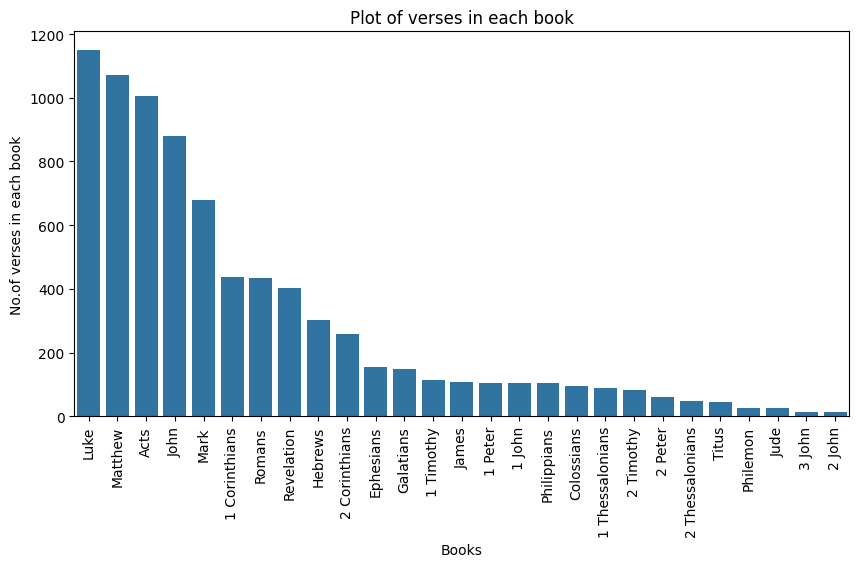

In [ ]:
# plot it to visualize

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title('Plot of verses in each book')
plt.xlabel('Books')
plt.ylabel('No.of verses in each book')
sns.countplot(x='book', data=df, order= df['book'].value_counts().index)

Book of **Psalms** has the **highest** number of verses.

In [ ]:
# text length analysis

df['text'].apply(lambda x: len(x.split())).describe()

,text
count,7957.000000
mean,22.669473
std,8.468428
min,2.000000
25%,16.000000
50%,22.000000
75%,28.000000
max,68.000000


On an **average** the number of words in a verse is **25**. The **minimum** number of words in a verse is **2**. The words in a verse are **normally** distributed.

In [ ]:
# class imbalance check, by check how many verses belongs to each book

book_counts = df['book'].value_counts()
print(book_counts.describe())

count      27.000000
mean      294.703704
std       351.360632
min        13.000000
25%        72.000000
50%       108.000000
75%       418.500000
max      1151.000000
Name: count, dtype: float64


**Interpretation:** <br>
count      66.000000   ---> There are 66 books = 66 classes

mean      471.24       ---> On average, each book has ~471 verses

std       504.65       ---> Large standard deviation → wide spread in class sizes

min        13.00       ---> Some books have as few as 13 verses

25%        86.00       ---> 25% books have fewer than 86 verses

50%       216.50       ---> Half have fewer than ~216 verses

75%       820.50       ---> 25% books have more than 820 verses

max      2461.00       ---> Largest book has 2461 verses

So, it is clear that there is **class imbalance**, as a **few books dominate** the dataset. <br>
**Many books are underreperesented**, which can cause the model to favor the majority classes





> **Decision to be made while modelling**:
---

1.   Should **class weights** be used in the model?
2.   Or should **resampling** (oversample minority or undersample majority classes) be done?



In [ ]:
# make a basic word cloud to see the most frequent words in the whole corpus

from wordcloud import WordCloud

# gather data in a single variable
text_blob = ' '.join(df['text'].values)
text_blob

"The book of the generation of Jesus Christ, the son of David, the son of Abraham. \n Abraham begat Isaac; and Isaac begat Jacob; and Jacob begat Judas and his brethren; \n And Judas begat Phares and Zara of Thamar; and Phares begat Esrom; and Esrom begat Aram; \n And Aram begat Aminadab; and Aminadab begat Naasson; and Naasson begat Salmon; \n And Salmon begat Booz of Rachab; and Booz begat Obed of Ruth; and Obed begat Jesse; \n And Jesse begat David the king; and David the king begat Solomon of her that had been the wife of Urias; \n And Solomon begat Roboam; and Roboam begat Abia; and Abia begat Asa; \n And Asa begat Josaphat; and Josaphat begat Joram; and Joram begat Ozias; \n And Ozias begat Joatham; and Joatham begat Achaz; and Achaz begat Ezekias; \n And Ezekias begat Manasses; and Manasses begat Amon; and Amon begat Josias; \n And Josias begat Jechonias and his brethren, about the time they were carried away to Babylon: \n And after they were brought to Babylon, Jechonias begat

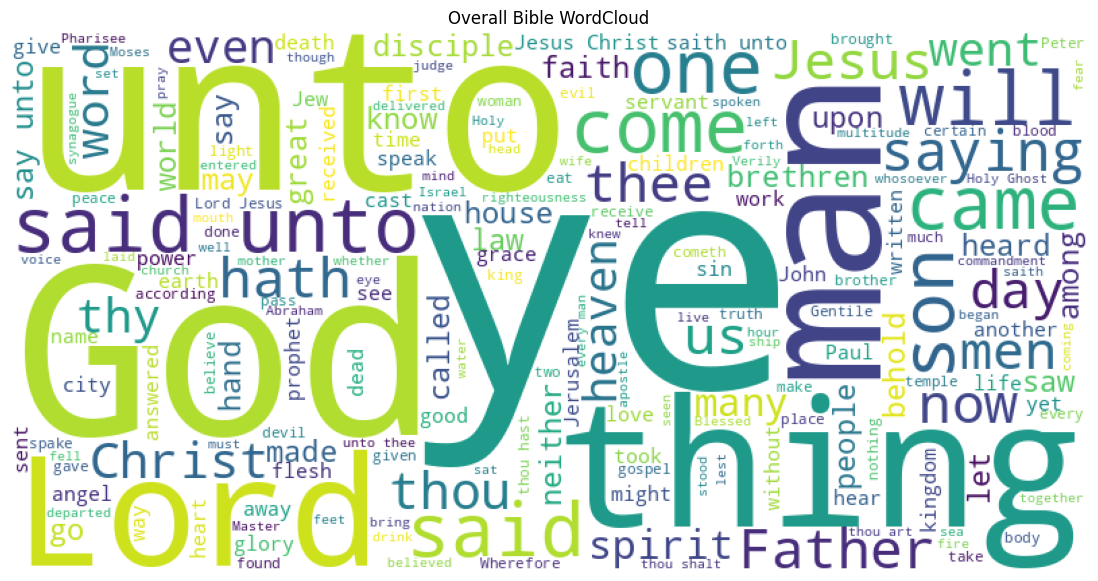

In [ ]:
# make cloud instance

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.title("Overall Bible WordCloud")
plt.axis('off')
plt.show()

Removing words like: unto, came, thou, thee, ye ,went i.e the **stop words have to be treated** later, as some of them have a high frequency

Surprisingly, the word **Jesus is used very less**!




# **PHASE 3: Data Cleaning**



* Remove punctuation, special characters
* Lowercase all text
* Remove empty or extremely short verses
* Optional: Handle class imbalance (downsampling/upsampling)



### Remove punctuations and special characters

In [ ]:
# remove all the punctuations
import string
df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

df['text']

/tmp/ipython-input-3922366351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


,text
23145,The book of the generation of Jesus Christ the...
23146,Abraham begat Isaac and Isaac begat Jacob and ...
23147,And Judas begat Phares and Zara of Thamar and ...
23148,And Aram begat Aminadab and Aminadab begat Naa...
23149,And Salmon begat Booz of Rachab and Booz begat...
...,...
31097,And the Spirit and the bride say Come And let ...
31098,For I testify unto every man that heareth the ...
31099,And if any man shall take away from the words ...
31100,He which testifieth these things saith Surely ...


### Lower case all the texts

In [ ]:
# lowercase all the text
df['text'] = df['text'].apply(lambda x  : x.lower())
df['book'] = df['book'].apply(lambda x  : x.lower())

df

/tmp/ipython-input-120217456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x  : x.lower())
/tmp/ipython-input-120217456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book'] = df['book'].apply(lambda x  : x.lower())


,citation,book,chapter,verse,text
23145,Matthew 1:1,matthew,1,1,the book of the generation of jesus christ the...
23146,Matthew 1:2,matthew,1,2,abraham begat isaac and isaac begat jacob and ...
23147,Matthew 1:3,matthew,1,3,and judas begat phares and zara of thamar and ...
23148,Matthew 1:4,matthew,1,4,and aram begat aminadab and aminadab begat naa...
23149,Matthew 1:5,matthew,1,5,and salmon begat booz of rachab and booz begat...
...,...,...,...,...,...
31097,Revelation 22:17,revelation,22,17,and the spirit and the bride say come and let ...
31098,Revelation 22:18,revelation,22,18,for i testify unto every man that heareth the ...
31099,Revelation 22:19,revelation,22,19,and if any man shall take away from the words ...
31100,Revelation 22:20,revelation,22,20,he which testifieth these things saith surely ...


### Remove empty verses or short verses

**Make a copy of the data now to keep an original copy for future use.**

In [ ]:
# make a copy and work on it for further preprocessing
df_copy_data = df.copy()

In [ ]:
# Remove empty or extremely short verses

**Why remove short verses?** <br>


1.   Too little semantic content (might not carry enough unique info to help the model distinguish)
2.   Higher risk of overlap between the books (short verses may be generic, occuring in my books)
1.   Poor embeddings (short text results in low-dim/sparse embeddings, which are less informative)
2.   To improve the signal-to-noise ratio





In [ ]:

df_copy_data['text'].apply(lambda x: len(x.split())).describe()

,text
count,7957.000000
mean,22.669473
std,8.468428
min,2.000000
25%,16.000000
50%,22.000000
75%,28.000000
max,68.000000


**min two words** in a verse, **set a threshold** to remove only the expremely small verses




<Axes: >

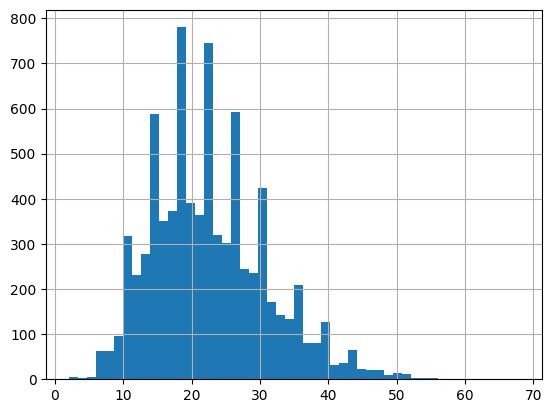

In [ ]:
# number of verses with word count less than 4 words
df_copy_data['verse_length'] = df_copy_data['text'].apply(lambda x: len(x.split()))
df_copy_data['verse_length'].hist(bins=50)

In [ ]:
# print 10 shortest verses
df_copy_data[df_copy_data['verse_length'] <= 4].sort_values(by='verse_length')

,citation,book,chapter,verse,text,verse_length
26558,John 11:35,john,11,35,jesus wept \n,2
29637,1 Thessalonians 5:16,1 thessalonians,5,16,rejoice evermore \n,2
25683,Luke 17:32,luke,17,32,remember lots wife \n,3
29638,1 Thessalonians 5:17,1 thessalonians,5,17,pray without ceasing \n,3
29641,1 Thessalonians 5:20,1 thessalonians,5,20,despise not prophesyings \n,3
29640,1 Thessalonians 5:19,1 thessalonians,5,19,quench not the spirit \n,4
29646,1 Thessalonians 5:25,1 thessalonians,5,25,brethren pray for us \n,4
30242,Hebrews 13:1,hebrews,13,1,let brotherly love continue \n,4


**You might also keep short verses if they are very unique or from rare books.**

But here we can see most of the verses under 4 words are not that meaningful, so can remove them all.

**just to be cautious, will make two df, one with the short verses , the other without and them use to train them separatley and compare metrics**

In [ ]:
df_without_short_verse = df_copy_data.copy()
df_with_short_verse = df_copy_data.copy()

In [ ]:
# remove the short verses <= 4
df_without_short_verse = df_without_short_verse[df_without_short_verse['verse_length'] >= 4]

In [ ]:

# print the shape of both the copies
print(f'df shape [with the short verses]: {df_with_short_verse.shape}')
print(f'df shape [without the short verses]: {df_without_short_verse.shape}')

df shape [with the short verses]: (7957, 6)
df shape [without the short verses]: (7952, 6)


### Handle Class Imbalance


> Data Level Methods

    1.   Undersampling (for large classes)
    2.   Oversampling (for small classes)
    3.   SMOTE (for numerical features)




> Model Level Methods:


    1.   Using class weights (for classifiers like Logistic regression, SVM, MLP)
    2.   Loss Weighting (this is for Neural Nets)



> Evaluation Level consideration

    1.   F1-score
    2.   Precision/Recall - per class
    3.   Confusion matrix


**Which one to use in our case?**


---



It is better to use **Model-level methods**, using class_weight in the classifier models and keep the data as is, no dropping (could lead to info loss) , no duplicate verses (could overfit the model due to repetition)<br>

**Will have to be taken care of while data modelling.**


# **PHASE 4: Text Preprocessing**

**The goal of text preprocessing is to prepare the cleaned text for making vector embeddings**:




1.   creating word tokens
2.   removing stop words
3.   bring words/tokens to their root form (using WordNetLemmatizer)



In [ ]:
# import necessary libraries

import re  # for regular expressions
import nltk # for text preprocessing
from nltk.tokenize import word_tokenize   # converts sentence into word tokens
from nltk.corpus import stopwords  # removes stop words from the corpus
from nltk.stem import WordNetLemmatizer  # brings the tokens to their root form
from tqdm import tqdm   # progress bar visual while preprocessing the text

# download the required resources
nltk.download('punkt_tab', force=True)
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)
nltk.download('omw-1.4', force=True)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# inspect all the stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

It is better to **not remove all the stop words** blindly, some like "not, against, he/she, must" may carry some meaning.

Will have to make a custom stop words set

In [ ]:
stop_words = set(stopwords.words('english'))

# Keep these words
keep_words = {'he', 'she', 'they', 'who', 'whom', 'i', 'we', 'you', 'against','all','not','my', 'will', 'shall', 'must', 'and', 'but', 'or'}

# since both are sets , perform a diff
final_stop_words = stop_words - keep_words
final_stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'ain',
 'am',
 'an',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 

In [ ]:

# make lemmatizer instance
lemmatizer = WordNetLemmatizer()

In [ ]:
# define the text preprocessing function

def preprocess_text(text):
  # lower-case
  text = text.lower()

  # remove pinctuation & special chars
  text = re.sub(r'[^a-zA-Z\s]', '', text)

  # tokenize
  tokens = word_tokenize(text)

  # remove stopwords
  filtered_tokens = [word for word in tokens if word not in stop_words]

  # lemmatize the tokens (as verbs)
  lemma_tokens = [lemmatizer.lemmatize(word,pos='v') for word in filtered_tokens]

  return ' '.join(lemma_tokens)

In [ ]:
import shutil
shutil.rmtree('/root/nltk_data/tokenizers/punkt', ignore_errors=True)
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# apply the text-prepocessing function on both the dfs (with and without short verses)

tqdm.pandas()  # for showing the progress bar

df_without_short_verse['text'] = df_without_short_verse['text'].apply(preprocess_text)
df_with_short_verse['text'] = df_with_short_verse['text'].apply(preprocess_text)

In [ ]:
# check the preprocessed data

df_without_short_verse.head()

,citation,book,chapter,verse,text,verse_length
23145,Matthew 1:1,matthew,1,1,book generation jesus christ son david son abr...,16
23146,Matthew 1:2,matthew,1,2,abraham beget isaac isaac beget jacob jacob be...,14
23147,Matthew 1:3,matthew,1,3,judas beget phares zara thamar phares beget es...,16
23148,Matthew 1:4,matthew,1,4,aram beget aminadab aminadab beget naasson naa...,12
23149,Matthew 1:5,matthew,1,5,salmon beget booz rachab booz beget obed ruth ...,16


In [ ]:
# check the preprocessed data

df_with_short_verse.head()

,citation,book,chapter,verse,text,verse_length
23145,Matthew 1:1,matthew,1,1,book generation jesus christ son david son abr...,16
23146,Matthew 1:2,matthew,1,2,abraham beget isaac isaac beget jacob jacob be...,14
23147,Matthew 1:3,matthew,1,3,judas beget phares zara thamar phares beget es...,16
23148,Matthew 1:4,matthew,1,4,aram beget aminadab aminadab beget naasson naa...,12
23149,Matthew 1:5,matthew,1,5,salmon beget booz rachab booz beget obed ruth ...,16


In [ ]:
# save and download the files

df_without_short_verse.to_csv('df_without_short_verse.csv', index=False)
# df_with_short_verse.to_csv('df_with_short_verse.csv', index=False)

# download
from google.colab import files

files.download('df_without_short_verse.csv')
# files.download('df_with_short_verse.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **PHASE 5: Feature Engineering**

**Text** has to be now converted to **vectors** (numerical representations) so that our models will **learn patterns** in the data.
<br> <br>
**Various text vectorization techniques we will be using are :**

    1.   CountVectorizer (Bag of words)
    2.   TF-IDF (uni-/word level)
    3.   TF-IDF (n-grams: bi-grams)
    4.   Word2Vec (vector averaging)
    5.   Doc2Vec
    6.   BERT Embeddings (sentence -level vectorizer)


### Bag of Words (BOW)

In [ ]:
# import cv
from sklearn.feature_extraction.text import CountVectorizer

# instantiate cv
cv = CountVectorizer()

# fit and transform cv, function
def get_cv(df):
  X_cv = cv.fit_transform(df['text'])
  return X_cv

# apply on both the dataframes (without short verses and with short verses)
df_cv_wo = pd.DataFrame(get_cv(df_without_short_verse).toarray(), columns=cv.get_feature_names_out())
df_cv_w = pd.DataFrame(get_cv(df_with_short_verse).toarray(), columns=cv.get_feature_names_out())

df_cv_wo['label'] = df_without_short_verse['book'].reset_index(drop=True)
df_cv_w['label'] = df_with_short_verse['book'].reset_index(drop=True)

In [ ]:
df_cv_wo

,aaron,aarons,abaddon,abase,abba,abel,abhor,abhorrest,abia,abiathar,...,zara,zeal,zealous,zealously,zebedee,zebedees,zelotes,zenas,zorobabel,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,matthew
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,matthew
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,matthew
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,matthew
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,matthew
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,revelation
7948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,revelation
7949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,revelation
7950,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,revelation


,count
label,


In [ ]:
# save and download the embeddings in the downloads section

df_cv_wo.to_csv('df_cv_wo_embeddings.csv', index=False)
# df_cv_w.to_csv('df_cv_w_embeddings.csv', index=False)

from google.colab import files

files.download('df_cv_wo_embeddings.csv')
# files.download('df_cv_w_embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cv_w

,aaron,aarons,abaddon,abase,abba,abel,abhor,abhorrest,abia,abiathar,...,zara,zeal,zealous,zealously,zebedee,zebedees,zelotes,zenas,zorobabel,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
7953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
7954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
7955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
# inspect one vector embedding
df_cv_w.iloc[0,:]

,0
aaron,0
aarons,0
abaddon,0
abase,0
abba,0
...,...
zebedees,0
zelotes,0
zenas,0
zorobabel,0


### TF-IDF (uni-grams)




**TF-IDF Score**: The product of TF and IDF — words(uni-grams) frequent in a document but rare in the dataset get the **highest** values.

In [ ]:
# import packages
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate tfidf
tfidf = TfidfVectorizer()

# make a function
def get_tfidf(df):
  X_tfidf = tfidf.fit_transform(df['text'])
  return X_tfidf

# apply to both the datasets
df_tfidf_wo = pd.DataFrame(get_tfidf(df_without_short_verse).toarray(), columns=tfidf.get_feature_names_out())
df_tfidf_wo['label'] = df_without_short_verse['book'].reset_index(drop=True)
df_tfidf_w = pd.DataFrame(get_tfidf(df_with_short_verse).toarray(), columns=tfidf.get_feature_names_out())
df_tfidf_w['label'] = df_with_short_verse['book'].reset_index(drop=True)

In [ ]:
# save and download the embeddings in the downloads section

# df_tfidf_w.to_csv('df_tfidf_w_embeddings.csv', index=False)
df_tfidf_wo.to_csv('df_tfidf_wo_embeddings.csv', index=False)

from google.colab import files

# files.download('df_tfidf_w_embeddings.csv')
files.download('df_tfidf_wo_embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# inspect one vector embedding
df_tfidf_w.iloc[0,:]

,0
aaron,0.0
aarons,0.0
abaddon,0.0
abase,0.0
abba,0.0
...,...
zebedees,0.0
zelotes,0.0
zenas,0.0
zorobabel,0.0


### TF-IDF (n-grams: bi-gram)

In [ ]:
# load the data
import pandas as pd
df_without_short_verse = pd.read_csv('/content/df_without_short_verse.csv')


In [ ]:
# using more than a word as a token , here two words at a time as a single token
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_ngram = TfidfVectorizer(ngram_range=(1, 2), max_features=50000)

# make a function
def get_tfidf(df):
  X_tfidf_ngram = tfidf_ngram.fit_transform(df['text'])
  return X_tfidf_ngram

df_tfidf_ngram_wo = pd.DataFrame(get_tfidf(df_without_short_verse).toarray(), columns=tfidf_ngram.get_feature_names_out())
# df_tfidf_ngram_w = pd.DataFrame(get_tfidf(df_with_short_verse).toarray(), columns=tfidf_ngram.get_feature_names_out())
df_tfidf_ngram_wo['label'] = df_without_short_verse['book'].reset_index(drop=True)
# df_tfidf_ngram_w['label'] = df_with_short_verse['book'].reset_index(drop=True)

Truncated SVD works on sparse matrices and helps shrink down feature size while preserving variance (semantic info). It’s like PCA for sparse data.

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=100)
df_tfidf_ngram_wo = svd.fit_transform(df_tfidf_ngram_wo)
# df_tfidf_ngram_w = svd.fit_transform(df_tfidf_ngram_w)

# save and download the embeddings in the downloads section
df_tfidf_ngram_wo.to_csv('df_tfidf_ngram_wo_embeddings.csv', index=False)

In [ ]:
# save and download the embeddings in the downloads section

# df_tfidf_ngram_w.to_csv('df_tfidf_ngram_w_embeddings.csv', index=False)
df_tfidf_ngram_wo.to_csv('df_tfidf_ngram_wo_embeddings.csv', index=False)

from google.colab import files

# files.download('df_tfidf_ngram_w_embeddings.csv')
files.download('df_tfidf_ngram_wo_embeddings.csv')

NameError: name 'df_tfidf_ngram_wo' is not defined

In [ ]:
# check a row
df_tfidf_ngram_wo.iloc[0,:]

NameError: name 'df_tfidf_ngram_wo' is not defined

### Word2Vec

I used the default CBOW (continuous bag of words) here, the other way is using Skip-gram (opposite of CBOW)

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

In [ ]:
# install packages
from gensim.models import Word2Vec

tokenized_text_wo = [text.split() for text in df_without_short_verse['text']]
tokenized_text_w = [text.split() for text in df_without_short_verse['text']]


# make a function
def get_w2v(df):
  w2v = Word2Vec(sentences=df, vector_size=200, window=5, min_count=1, workers=4)
  return w2v

w2v_wo = get_w2v(tokenized_text_wo)
w2v_w = get_w2v(tokenized_text_w)

# define avg_vector ( for document level vector representation)
def avg_vector(tokenized_text,model):
  vectors = []
  for text in tokenized_text:
    vectors.append(model.wv[text].mean(axis=0))
  return vectors

w2v_wo_vectors = avg_vector(tokenized_text_wo , w2v_wo)
w2v_w_vectors = avg_vector(tokenized_text_w , w2v_w)

# make dataframes for both cases
df_w2v_wo = pd.DataFrame(w2v_wo_vectors)
df_w2v_wo['label'] = df_without_short_verse['book'].reset_index(drop=True)
df_w2v_w = pd.DataFrame(w2v_w_vectors)
df_w2v_w['label'] = df_with_short_verse['book'].reset_index(drop=True)

In [ ]:
# save and download the embeddings in the downloads section

# df_w2v_w.to_csv('df_w2v_w_embeddings.csv', index=False)
df_w2v_wo.to_csv('df_w2v_wo_embeddings.csv', index=False)

from google.colab import files

# files.download('df_w2v_w_embeddings.csv')
files.download('df_w2v_wo_embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# check a row
df_w2v_wo.iloc[0,:]

,0
0,0.236283
1,0.080943
2,0.037831
3,0.096649
4,0.248636
...,...
196,0.096042
197,-0.378128
198,0.128999
199,0.011949


In [ ]:
# running some examples to check the embeddings

In [ ]:
# word similarity
w2v_w.wv.similarity('jesus', 'peter')

0.8775073

In [ ]:
# odd one
w2v_wo.wv.doesnt_match(['blood','covenant','sin','flesh','lord'])

'lord'

In [ ]:
# most similar
w2v_w.wv.most_similar('jesus')

[('wherefore', 0.9295238852500916),
 ('samuel', 0.9258413314819336),
 ('midwives', 0.921646773815155),
 ('balaam', 0.9166742563247681),
 ('answer', 0.916107714176178),
 ('balak', 0.9131903052330017),
 ('master', 0.9125934839248657),
 ('verily', 0.9097439646720886),
 ('servant', 0.9023089408874512),
 ('protest', 0.8958445191383362)]

In [ ]:
# reduce dims to visualize

from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X = pca.fit_transform(w2v_w.wv.get_normed_vectors())
print(X.shape)

(10523, 3)


In [ ]:
w2v_w

### Doc2Vec

 Unlike Word2Vec, which produces embedding for words, Doc2Vec produces embeddings for whole documents.

 Doc2Vec is like Word2Vec, but for whole documents (sentences, paragraphs).

It learns to embed a document (or sentence) into a vector space, preserving semantic relationships.

In [ ]:
# import packages
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk import word_tokenize

# define a function:
def get_doc2vec(df):
    # create documents (wrap each text into a labeled format that Doc2Vec needs.)
    documents = [TaggedDocument(words=word_tokenize(text), tags=[str(i)]) for i, text in enumerate(df['text'])]

    # train the model
    model = Doc2Vec(documents, vector_size=200, window=5, min_count=1, workers=4,epochs=40)

    # get vectors
    doc_vectors = [model.dv[str(i)] for i in range(len(df))]

    return doc_vectors

dv_vectors_wo = get_doc2vec(df_without_short_verse)
dv_vectors_w = get_doc2vec(df_with_short_verse)

# store in a df
df_d2v_wo = pd.DataFrame(dv_vectors_wo)
df_d2v_wo['label'] = df_without_short_verse['book'].reset_index(drop=True)
df_d2v_w = pd.DataFrame(dv_vectors_w)
df_d2v_w['label'] = df_with_short_verse['book'].reset_index(drop=True)

**Core Concepts**<br>
*Doc2Vec has two popular algorithms:*

**Distributed Memory (DM)** :
This is ***similar to the CBOW Word2Vec*** model. It predicts a target word given both the context words and the document ID vector, which acts as a memory that remembers the topic of the document.

**Distributed Bag of Words (DBOW)** :
***Similar to Skip-Gram Word2Vec***, it predicts random words from the document given the document vector alone, ignoring the context words.

In [ ]:
# save and download the embeddings in the downloads section

# df_d2v_w.to_csv('df_d2v_w_embeddings.csv', index=False)
df_d2v_wo.to_csv('df_d2v_wo_embeddings.csv', index=False)

from google.colab import files

# files.download('df_d2v_w_embeddings.csv')
files.download('df_d2v_wo_embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_d2v_wo #.iloc[0,:]

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0.087546,-0.077596,0.051114,0.009560,0.170713,-0.107455,-0.044730,0.168565,0.003980,0.243086,...,-0.034379,-0.166143,-0.093385,0.033483,0.130690,0.010318,-0.103042,0.023011,-0.028167,genesis
1,0.073605,0.030138,0.023686,-0.177208,-0.061025,-0.036762,0.046961,0.307904,-0.198789,0.167792,...,0.179928,-0.034168,0.259798,-0.042711,-0.110667,-0.097673,-0.180988,-0.115796,-0.102914,genesis
2,0.055436,-0.116432,0.013851,-0.003888,0.125020,-0.018004,0.036553,0.066954,-0.056477,0.156742,...,-0.051848,-0.116023,-0.070320,-0.010618,0.024311,-0.036477,-0.024973,-0.096764,0.006960,genesis
3,0.138560,-0.234743,-0.042314,0.131280,0.027068,0.024480,0.009332,0.022764,-0.176223,0.237811,...,0.019202,0.042397,0.009801,0.007593,0.069476,-0.136187,0.003705,-0.183440,0.127061,genesis
4,-0.132643,-0.213859,-0.022719,-0.100939,0.045591,-0.061594,-0.133453,0.182088,0.023598,0.208736,...,-0.071863,-0.319255,-0.027365,-0.006801,0.187332,0.060601,-0.024158,-0.060768,-0.001599,genesis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31056,0.102731,-0.283736,-0.168225,-0.359608,0.040628,0.221855,0.149717,0.099039,0.008503,0.583325,...,0.143431,-0.083244,0.160362,-0.076746,-0.031908,-0.099890,0.053368,-0.099647,0.159291,revelation
31057,0.140984,-0.201358,-0.099929,0.068432,0.135302,-0.005042,0.143099,0.052659,-0.174464,-0.000506,...,0.120057,-0.289409,-0.132965,0.214567,-0.289326,-0.196760,0.111410,0.054367,-0.236385,revelation
31058,0.197415,-0.423898,0.077276,-0.141972,0.271852,0.116196,-0.055744,0.108364,-0.109176,-0.109970,...,-0.019363,-0.273768,0.121665,-0.021633,-0.377986,-0.307032,-0.113894,0.209905,-0.255906,revelation
31059,0.229756,0.280699,-0.102002,-0.002496,-0.077351,0.230772,0.028965,0.019376,-0.077081,-0.043062,...,0.280891,-0.001840,0.150373,0.279709,-0.051354,-0.096350,0.108834,-0.029440,-0.070343,revelation


### BERT Embedding

# **Save all the data with vector embeddings, in different data frames**